Import the MicroGP package (first install it: ``!pip install microgp``)


In [1]:
import microgp as ugp
ugp.logging.DefaultLogger.setLevel(level=ugp.logging.INFO)

M:\LuBa\Documenti\GitHub\microgp4\src\microgp\__init__.py:65: UserWarning: Paranoia checks are active: performances can be significantly impaired (consider using '-O')
  warnings.warn(WARN_DBG, UserWarning)


### Creation of the individuals structure
Define a parameter of type ugp.parameter.Bitstring and length = 8

In [2]:
word8 = ugp.make_parameter(ugp.parameter.Bitstring, len_=8)

Define a macro that contains a parameter of type ugp.parameter.Bitstring

In [3]:
word_macro = ugp.Macro("{word8}", {'word8': word8})

Create a section containing a macro

In [4]:
word_section = ugp.make_section(word_macro, size=(1, 1), name='word_sec')

Create the instruction library

In [5]:
library = ugp.Constraints()

Define the sections in the library

In [6]:
library['main'] = ["Bitstring:", word_section]

### Define the evaluator method and the fitness type

In [7]:
def my_script(data: str):
    count = data.count('1')
    return list(str(count))

library.evaluator = ugp.fitness.make_evaluator(evaluator=my_script, fitness_type=ugp.fitness.Lexicographic)

### Create a list of operators with their aritiy

In [8]:
operators = ugp.Operators()

Add initialization operators

In [9]:
operators += ugp.GenOperator(ugp.create_random_individual, 0)

Add mutation operators

In [10]:
operators += ugp.GenOperator(ugp.hierarchical_mutation, 1)
operators += ugp.GenOperator(ugp.flat_mutation, 1)

Create the object that will manage the evolution

In [11]:
mu = 10
nu = 20
sigma = 0.7
lambda_ = 7
max_age = 10

darwin = ugp.Darwin(
    constraints=library,
    operators=operators,
    mu=mu,
    nu=nu,
    lambda_=lambda_,
    sigma=sigma,
    max_age=max_age,
)

Evolve (create random individuals and use selected genetic operators to evolve them)

In [12]:
darwin.evolve()

Print best individuals, and their graph

12:22:14 These are the best ever individuals:
12:22:14 Bitstring:
12:22:14 10111111


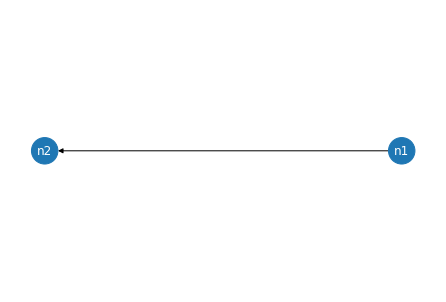

12:22:14 Fitness score: Lexicographic(7)

12:22:14 Bitstring:
12:22:14 01111111


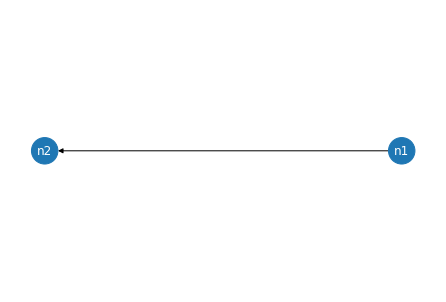

12:22:14 Fitness score: Lexicographic(7)

12:22:14 Bitstring:
12:22:14 11101111


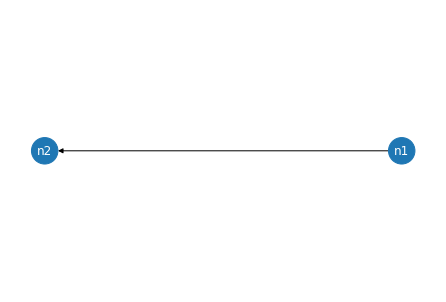

12:22:15 Fitness score: Lexicographic(7)



In [13]:
ugp.print_individual(darwin.archive.individuals,
                     msg="These are the best ever individuals:",
                     plot=True, score=True)